In [1]:
'''Project for data analysis on dow jones index in 2011
Problem want to be investigated:
Q1: What is the average price for each stock?
Q2: How is the correlation between two stocks?
Q3: What parameters can lead to higher pricing?
Q4: Develop model for stock IBM to predict pricing?
'''

import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn

%matplotlib inline
%precision 3

'%.3f'

In [2]:
# requests module
import requests, zipfile
import io

In [11]:
# import Plotly for plotting stock graph
import plotly
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# machine learning module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [13]:
# data extract from the UCI datasets
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'

# get data from the url
res = requests.get(url, stream = True)

# read and extract zipfile 
z = zipfile.ZipFile(io.BytesIO(res.content)).extractall()

In [14]:
# convert received datasets into DataFrame
dj_index = pd.read_csv('dow_jones_index.data')
df = DataFrame(dj_index)

# print the five rows data for confirmation
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [17]:
# data transform with preprocessing and data cleaning

# know the basic information of dataset
print(f'The Shape of Dow_Jones_Data: {df.shape}.')

The Shape of Dow_Jones_Data: (750, 16).


In [18]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [22]:
# find the '$' sign in below columns
df_replace = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']

# to replace the '$' sign in columns and convert them to be number type
for i in df_replace:
    df[i] = pd.to_numeric(df[i].map(lambda x: str(x).replace('$', '')))

df.head()    

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [24]:
# double check on data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    float64
 4   high                                750 non-null    float64
 5   low                                 750 non-null    float64
 6   close                               750 non-null    float64
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [25]:
# import date type module
import datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

In [26]:
# checking any missing data and relevance
df.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [29]:
# only missing data in two columns
# not recommended to just delete the rows of data because it lead to unaccurate analysis for other columns
# not recommended to fill missing values by previous values or interpolation because not make sense for the values compared to last weeks
# suggested to delete the two columns due to irrelevance of our analysis
df.drop(['percent_change_volume_over_last_wk', 'previous_weeks_volume'], axis=1, inplace=True)

KeyError: "['percent_change_volume_over_last_wk', 'previous_weeks_volume'] not found in axis"

In [30]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,17.33,17.37,0.230814,97,0.175029


In [31]:
# double check no missing values in datasets 
df.isnull().sum()

quarter                            0
stock                              0
date                               0
open                               0
high                               0
low                                0
close                              0
volume                             0
percent_change_price               0
next_weeks_open                    0
next_weeks_close                   0
percent_change_next_weeks_price    0
days_to_next_dividend              0
percent_return_next_dividend       0
dtype: int64

In [34]:
# let's see the average pricing for each stock 
df.groupby(['stock'])[['open', 'high', 'low', 'close']].mean()

,open,high,low,close
stock,,,,
AA,16.5640,17.0152,16.0636,16.5044
AXP,46.4880,47.5684,45.5976,46.7124
BA,73.2972,74.7712,71.6432,73.4480
BAC,13.1756,13.4548,12.7776,13.0516
CAT,103.0672,105.5296,99.9932,103.1520
CSCO,18.1224,18.4484,17.6040,17.8992
CVX,100.8808,102.9792,98.8252,101.1756
DD,52.7068,53.7992,51.4244,52.8736
DIS,41.1944,42.0324,40.3132,41.2496


In [45]:
# for better analysis, use 'close' price is enough
# Q1: what is the average price for each stock?
df.groupby(['stock'])['close'].describe()

,count,mean,std,min,25%,50%,75%,max
stock,,,,,,,,
AA,25.0,16.5044,0.772922,14.72,16.03,16.52,17.10,17.92
AXP,25.0,46.7124,2.396248,43.53,44.36,46.25,48.50,51.19
BA,25.0,73.4480,3.087631,69.10,71.64,72.69,74.84,79.78
BAC,25.0,13.0516,1.417382,10.52,11.93,13.37,14.25,15.25
CAT,25.0,103.1520,6.218651,92.75,99.59,103.54,107.21,115.41
CSCO,25.0,17.8992,1.984095,14.93,16.88,17.52,18.70,22.05
CVX,25.0,101.1756,5.267066,91.19,97.90,102.10,103.75,109.66
DD,25.0,52.8736,2.367048,48.35,50.29,52.91,54.63,56.79
DIS,25.0,41.2496,1.882473,37.58,39.45,41.52,42.95,43.56


In [69]:
# let's find the top 5 highest average price stock
top_five_close = df.groupby(['stock'])['close'].mean().sort_values(ascending=False)[0:5]
print('The top five stock with highest average price: {}'.format(top_five_close))

The top five stock with highest average price: stock
IBM    163.1016
CAT    103.1520
CVX    101.1756
MMM     91.6980
UTX     84.0332
Name: close, dtype: float64


In [71]:
# tidy up the stock close data according to date
df_close = df.set_index(['date', 'stock']).unstack()['close']
df_close

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28
2011-02-11,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82
2011-02-18,17.28,45.53,73.04,14.75,105.86,18.85,98.72,55.98,43.56,21.44,...,32.85,27.06,19.19,64.30,28.57,60.92,85.01,36.62,55.38,84.50
2011-02-25,16.68,43.53,72.30,14.20,102.00,18.64,102.10,54.07,42.95,20.82,...,32.19,26.55,18.86,62.84,28.13,59.60,83.37,35.97,51.75,85.34
2011-03-04,16.58,43.72,71.80,14.12,103.04,18.40,103.75,53.87,43.55,20.37,...,33.06,25.95,19.66,62.03,27.92,59.18,82.86,36.08,52.07,85.08


In [72]:
# check correlation matrix
# Q2: How is the correlation between two stocks?
df_close.corr()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


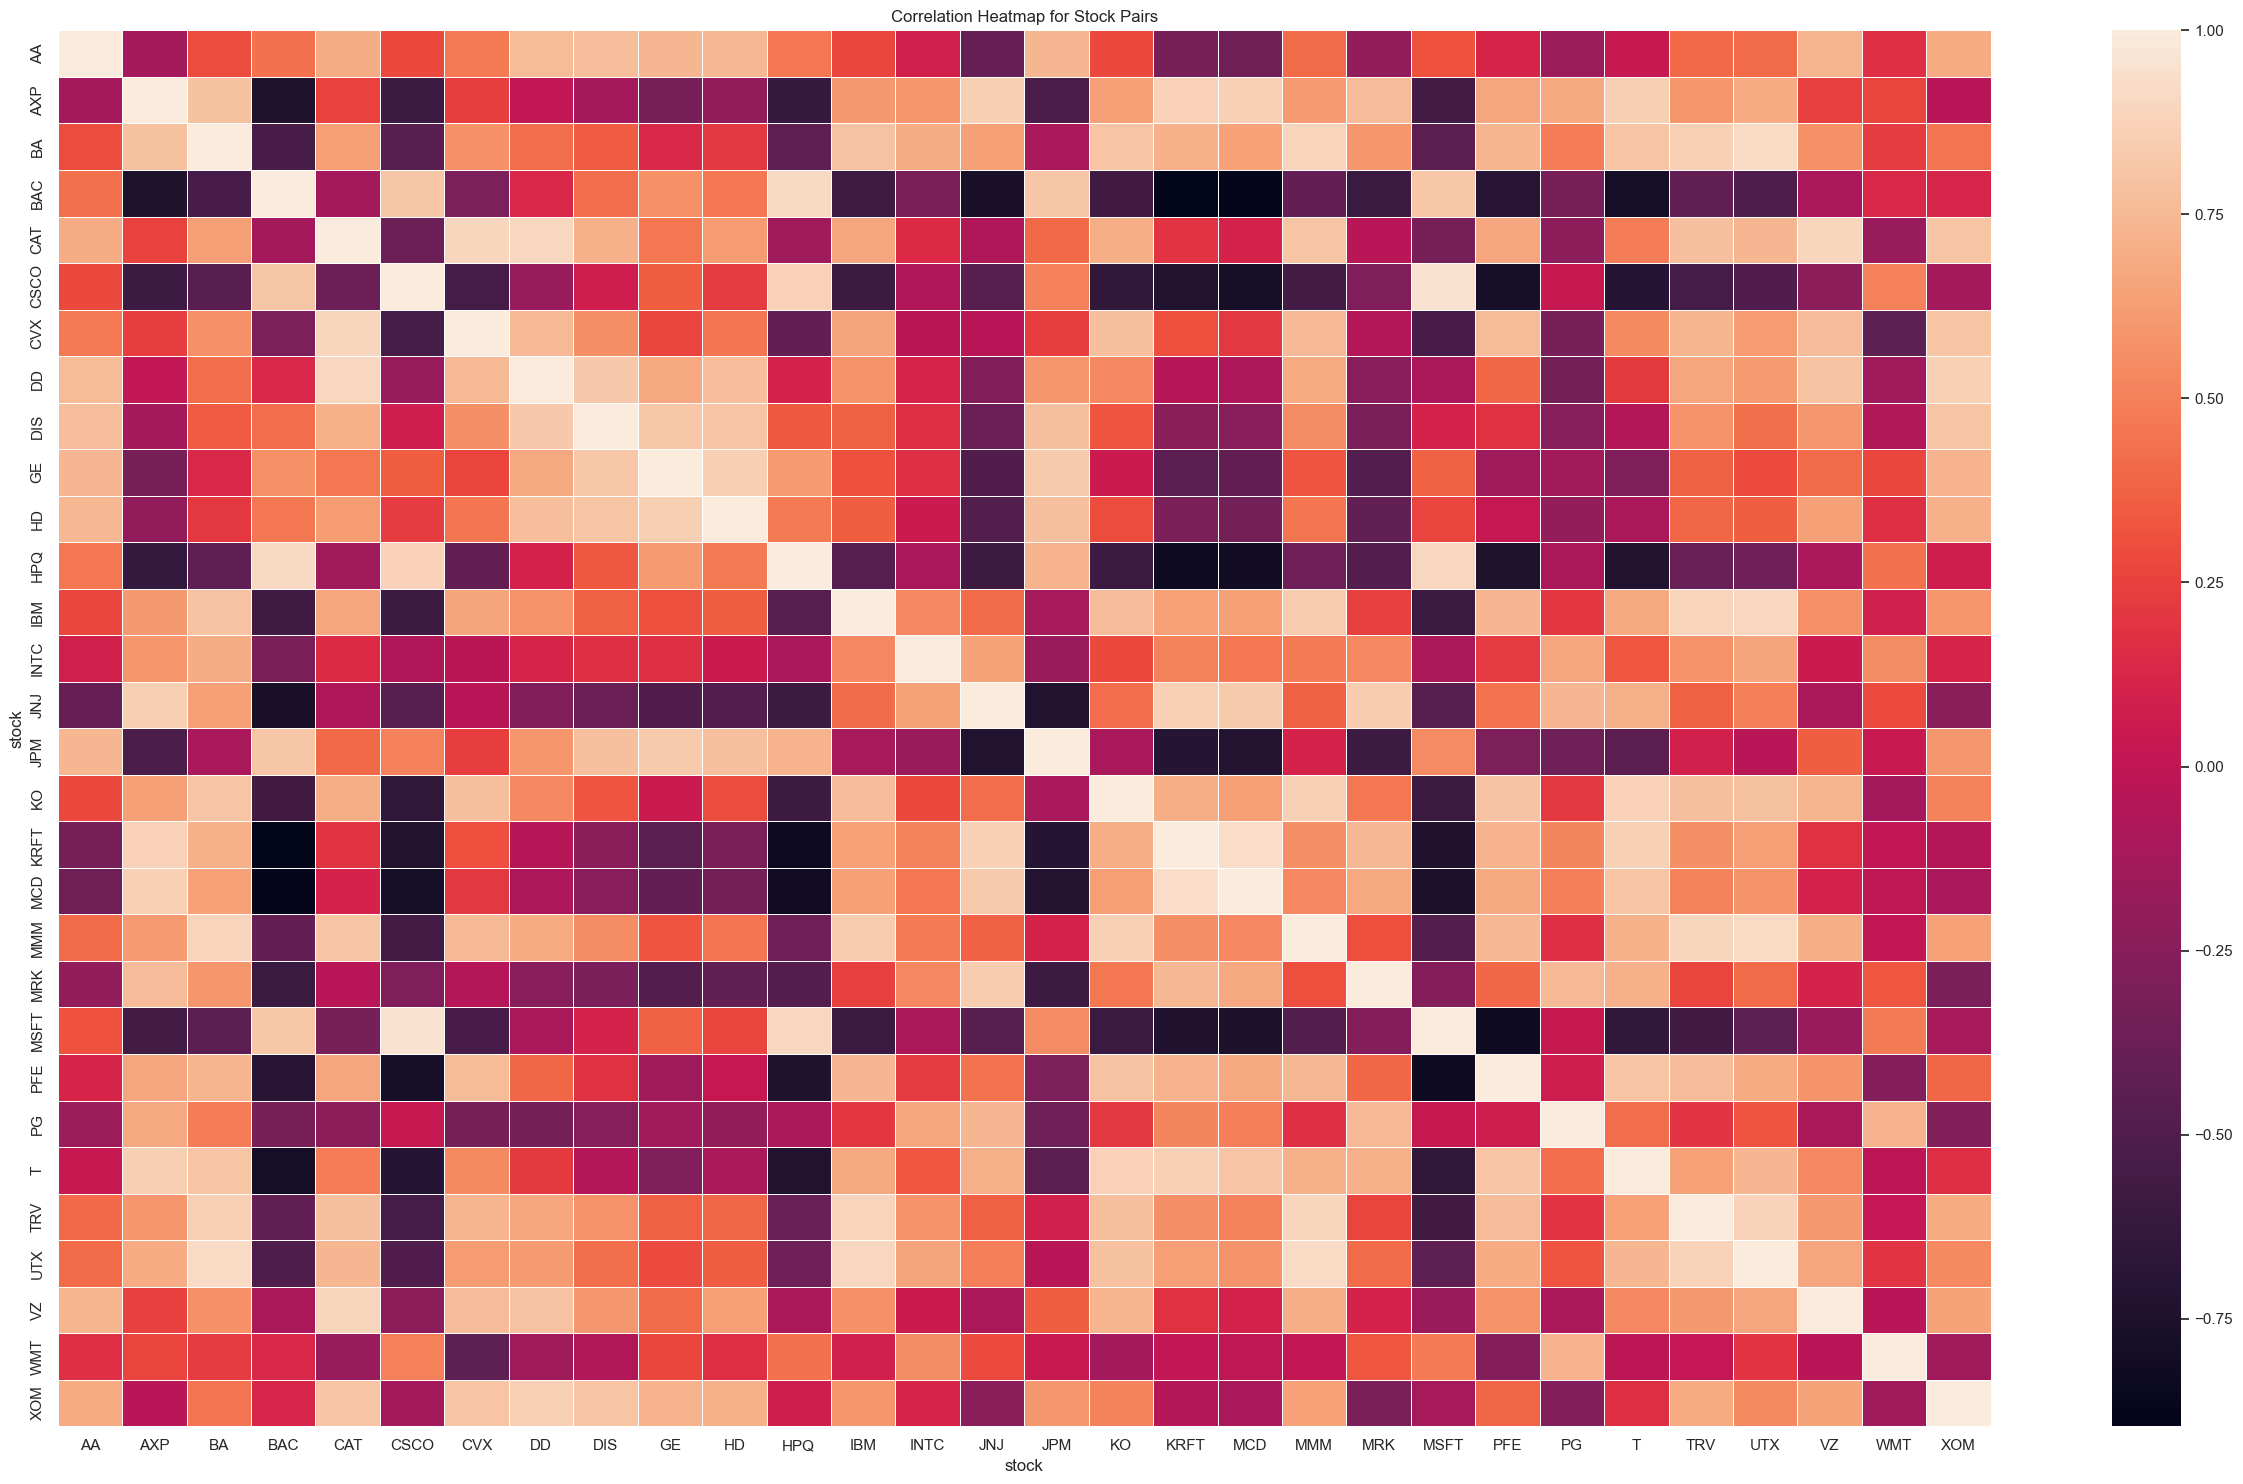

In [79]:
# apply heatmap to visualize the correlation
plt.figure(figsize=(25, 15))
sns.heatmap(df_close.corr(), linewidths=0.5)
plt.title('Correlation Heatmap for Stock Pairs')
plt.tight_layout()

# the correlation heatmap can help us to know the correlation
# for example, price of AA is highly relational to DD, DIS (above 0.7).

In [102]:
df_close.corr().columns[0]

'AA'

In [115]:
# extract diagonal and low trigular matrix values
dig_tri_drop = set()
for i in range(0, df_close.shape[1]):
    for j in range(0, i+1):
        dig_tri_drop.add((df_close.columns[i], df_close.columns[j]))

close_corr = df_close.corr().unstack()
close_corr = close_corr.drop(labels=dig_tri_drop).sort_values(ascending=False)[0:10]

print("Top ten correlation: \n{}".format(close_corr))

# it can be discovered that the most correlated pairs are CSCO and MSFT stock

Top ten correlation: 
stock  stock
CSCO   MSFT     0.953722
KRFT   MCD      0.929921
BA     UTX      0.916338
MMM    UTX      0.913696
BAC    HPQ      0.905817
HPQ    MSFT     0.903509
CAT    DD       0.902856
IBM    UTX      0.897552
MMM    TRV      0.891726
CAT    VZ       0.890315
dtype: float64


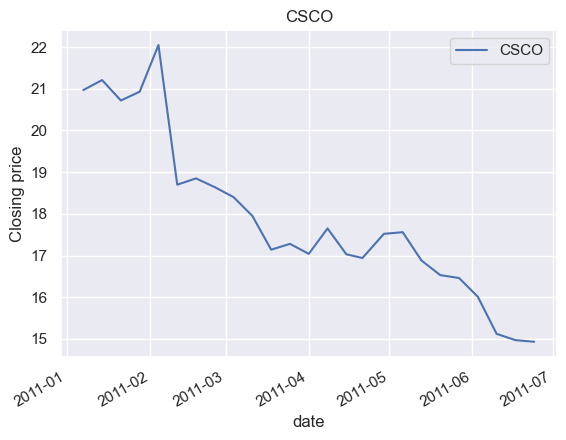

In [144]:
# for visualization of CSCO and MSFT stock
top_corr_pairs = close_corr[0:1]

def plot_graph(df, index):
    df[index].plot(title=index)
    plt.ylabel('Closing price')
    plt.legend(loc='best')
    plt.grid(True)

plot_graph(df_close, top_corr_pairs.index[0][0])


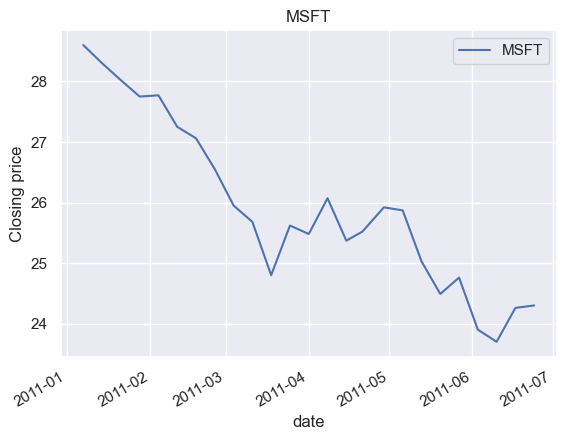

In [145]:
plot_graph(df_close, top_corr_pairs.index[0][1])

# After visualizing CSCO and MSFT correlation, 
# Pair trading strategy may be used by determining entry and exit points
# However, correlation is only characterizes short-term similar trend 
# Further consideration shall be made for long-term case

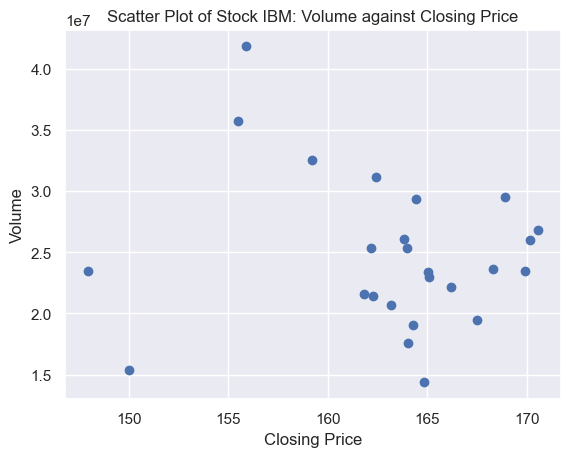

In [209]:
# Q3: investigate the potential relationship between close price and volume
# let take AA for example
target_stock = 'IBM'
x = df[df['stock'] == target_stock]['close']
y = df[df['stock'] == target_stock]['volume']

plt.scatter(x, y)
plt.title('Scatter Plot of Stock IBM: Volume against Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)

# can see that the closing price most likely to be high when volume is not in high level
# but it seems that the circumstance is not a must


In [221]:
# develop model for prediction of IBM stock
# Q4: develop model for stock IBM to predict pricing?

df_IBM = df[df.stock == target_stock][['close', 'open', 'volume', 'days_to_next_dividend', 'percent_return_next_dividend']]

# check for data correlation 
df_IBM.corr()

,close,open,volume,days_to_next_dividend,percent_return_next_dividend
close,1.000000,0.909937,-0.136127,0.181133,0.101476
open,0.909937,1.000000,-0.081095,0.344867,0.354002
volume,-0.136127,-0.081095,1.000000,-0.222127,-0.073461
days_to_next_dividend,0.181133,0.344867,-0.222127,1.000000,0.519259
percent_return_next_dividend,0.101476,0.354002,-0.073461,0.519259,1.000000


In [226]:
# the 'open' values may have extremely large correlation with the target
# collinearity shall be prevented 
# so let's check with the multi-collinearity diagnosis
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('close ~ open+volume+days_to_next_dividend+percent_return_next_dividend', data=df_IBM, return_type='dataframe')

vid_df = pd.DataFrame()
vid_df['variables'] = X.columns
vid_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vid_df)

                      variables          VIF
0                     Intercept  1231.517276
1                          open     1.191968
2                        volume     1.054845
3         days_to_next_dividend     1.492031
4  percent_return_next_dividend     1.441513


In [234]:
# Since all the variables have moderate correlation with 'close' target
# can be suitable for development of predictive model

from sklearn.preprocessing import StandardScaler

# set X and y data
X = df_IBM.drop('close', axis=1)
y = df_IBM['close']

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

# Data Standardlization to increase model performance in accuracy
sc = StandardScaler()
sc.fit(X_train)
X_train_st = sc.transform(X_train)
X_test_st = sc.transform(X_test)

# set multiple models, analyze which one have the highest score in accuracy
models = {
    'Linear_regression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=0),
    'KNegihborsRegreessor': KNeighborsRegressor(),
    'SVR': SVR(),
}

# record the score of each model
models_scores = {}
for name, model in models.items():
    model.fit(X_train_st, y_train)
    models_scores[(name, 'train')] = model.score(X_train_st, y_train)
    models_scores[(name, 'test')] = model.score(X_test_st, y_test)

# for visualization of models' scores
models_scores

{('Linear_regression', 'train'): 0.942,
 ('Linear_regression', 'test'): 0.593,
 ('Ridge', 'train'): 0.934,
 ('Ridge', 'test'): 0.687,
 ('DecisionTreeRegressor', 'train'): 0.999,
 ('DecisionTreeRegressor', 'test'): 0.613,
 ('KNegihborsRegreessor', 'train'): 0.473,
 ('KNegihborsRegreessor', 'test'): 0.484,
 ('SVR', 'train'): 0.251,
 ('SVR', 'test'): 0.146}

In [238]:
# visualization in table
Series(models_scores).unstack().sort_values(by='test', ascending=False)

# it can be observed that the top score in test can be achieved by Ridge model

,test,train
Ridge,0.687464,0.934375
DecisionTreeRegressor,0.612600,0.999352
Linear_regression,0.593140,0.941869
KNegihborsRegreessor,0.483984,0.472633
SVR,0.146351,0.251159


In [ ]:
# However, there are several limitation for the machine learning
# the amount of data is not large enough for more accurate result

# to perform more accurate and usable predictive model, deep learning techniques like MLP or LSTM can be tried with stock pricing data

In [ ]:
'''Conclusion
Q1: What is the average price for each stock?
Ans: can use describe() function to check each average price of the corresponding stock.
The top highest price stocks are IBM ($163.1), CAT ($103.2), CVX ($101.2), MMM ($91.7) and UTX ($84.0)
Therefore, for those who want to plan their trading strategy, the above high price stocks shall be considered with self-review of budget

Q2: How is the correlation between two stocks?
Ans: Correlation matrix can be formed to study the top 10 correlated stock pairs
For example, (CSCO & MSFT), (KRFD, MCD), (BA, UTX)
Those information can be reported to data scientist or quant developer for designing pairs trading algorithm to gain potential profit

Q3: What parameters can lead to higher pricing?
Ans: Relationship between closing price and volume have been checked.
According to the result, closing price is most likely to be high when volume is not in high level.
Thinking with financial knowledge, volume is actually counting the amount of buy and sell.
Therefore, the higher volume cannot garantee higher or lower closing price because individuals can buy and sell in the market.
After the whole day stock transaction, the volume of buy side and sell side can be balanced to keep the stock pricing with small fluctation.
For better idea of relationship analysis, volume may be better to be separated into buy side volume and sell side volume for analysis.
It may help to generate more impressive pattern of closing price with the change of buy side volume.

Q4: Develop model for stock IBM to predict pricing?
Ans: ML models are built for prediction of stock 'IBM' closing price after normalization.
Variance inflation factor can be checked for any multi-collinearity circumstance.
After checking the corresponding models' accuracy, 
the coefficient of determination in Ridge model is the best among selected models.
The result may show that regularization with loss function in Ridge model can suitably componensate the seriousness of overfitting,
especially as compared to linear regression.

However, the data may not large enough for the model testing.
Therefore, the accuracy can also be influenced.
'''